# Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Load Data

In [2]:
dataset=pd.read_csv('emails.csv') 
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
dataset.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction


In [5]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

In [6]:
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 1 categorical variables : 
 ['Email No.']


In [7]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

Email No.  contains  5172  labels


In [8]:
# view summary statistics in numerical variables to check for outliers
print(round(dataset[numerical].describe()),2)

          the      to     ect     and     for      of       a     you     hou  \
count  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0   
mean      7.0     6.0     5.0     3.0     3.0     3.0    56.0     2.0     2.0   
std      12.0    10.0    14.0     6.0     5.0     6.0    88.0     4.0     7.0   
min       0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     1.0     1.0     0.0     1.0     0.0    12.0     0.0     0.0   
50%       3.0     3.0     1.0     1.0     2.0     1.0    28.0     1.0     0.0   
75%       8.0     7.0     4.0     3.0     4.0     2.0    62.0     3.0     1.0   
max     210.0   132.0   344.0    89.0    47.0    77.0  1898.0    70.0   167.0   

           in  ...  connevey     jay  valued     lay  infrastructure  \
count  5172.0  ...    5172.0  5172.0  5172.0  5172.0          5172.0   
mean     11.0  ...       0.0     0.0     0.0     0.0             0.0   
std      19.0  ...       0.0     0.0     0.0     1.0  

# Data Preprocessing

In [9]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
dataset['Email No.']= LabelEncoder().fit_transform(dataset['Email No.'])
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y = dataset['Prediction']
x = dataset.drop(['Prediction'], axis=1)

In [11]:
print(x.head())

   Email No.  the  to  ect  and  for  of    a  you  hou  ...  enhancements  \
0          0    0   0    1    0    0   0    2    0    0  ...             0   
1       1111    8  13   24    6    6   2  102    1   27  ...             0   
2       2222    0   0    1    0    0   0    8    0    0  ...             0   
3       3333    0   5   22    0    5   1   51    2   10  ...             0   
4       4444    7   6   17    1    5   2   57    0    9  ...             0   

   connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
0         0    0       0    0               0         0         0   0    0  
1         0    0       0    0               0         0         0   1    0  
2         0    0       0    0               0         0         0   0    0  
3         0    0       0    0               0         0         0   0    0  
4         0    0       0    0               0         0         0   1    0  

[5 rows x 3001 columns]


In [12]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


# Splitting the dataset into training and test set  

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


In [14]:
print(x_train.head())

      Email No.  the  to  ect  and  for  of    a  you  hou  ...  enhancements  \
3459       2735    5   4    1    2    2   3   27    7    0  ...             0   
1385        430    3   6    4    6    0   2   57    2    0  ...             0   
1380        425    1   0    1    0    0   1    8    0    0  ...             0   
4462       3849   37  16    5   22    5  19  228    6    2  ...             0   
3840       3158    2   1    1    0    2   0   10    0    0  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3459         0    0       0    0               0         0         0   0    0  
1385         0    0       0    0               0         0         0   1    0  
1380         0    0       0    0               0         0         0   0    0  
4462         0    0       0    2               0         0         0   1    0  
3840         0    0       0    0               0         0         0   0    0  

[5 rows x 3001 columns]


In [15]:
print(x_test.head())

      Email No.  the  to  ect  and  for  of    a  you  hou  ...  enhancements  \
3324       2585   14   7    2    2    2   4   37    0    1  ...             0   
15          667    6   2    1    0    2   0   36    3    1  ...             0   
4950       4391   40   6    4    6    5  11  130    3    0  ...             0   
3964       3295   42  19    1    8    7   7  214    1    3  ...             0   
2315       1464    8  14    8    3    3   0   87    0    4  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3324         0    0       0    0               0         0         0   0    0  
15           0    0       0    0               0         0         0   0    0  
4950         0    0       0    0               0         0         0   1    0  
3964         0    0       0    1               0         4         0   3    0  
2315         0    0       0    0               0         0         0   5    0  

[5 rows x 3001 columns]


In [16]:
print(y_train[:10])

3459    1
1385    0
1380    0
4462    1
3840    0
1452    1
2849    0
3145    0
1271    0
1021    0
Name: Prediction, dtype: int64


In [17]:
print(y_test[:10])

3324    0
15      0
4950    0
3964    1
2315    0
861     1
2350    0
1767    0
965     0
2630    1
Name: Prediction, dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data 
x_test=scaler.transform(x_test)

# Build Model 

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state=0) # only 10 trees will b ok as dataset is only 400+ records. Default is 100.    
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred = classifier.predict(x_test)

# Evaluate Model 

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1088   23]
 [  21  420]]


In [22]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1111
           1       0.95      0.95      0.95       441

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.97      1552
weighted avg       0.97      0.97      0.97      1552



In [23]:
accuracy_score(y_test,y_pred)

0.9716494845360825

In [24]:
average_precision= average_precision_score(y_test,y_pred)
print(average_precision)

0.9164654650811013


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.92')

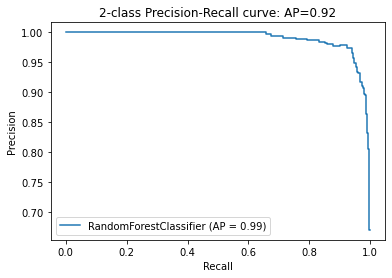

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))